In [100]:
# Import Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path 
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS
from afinn import Afinn
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [101]:
# Load and Read in CSV Squirrel Data
squirrel_df = pd.read_csv('Resources/nyc_squirrels_2.csv')  
squirrel_df = squirrel_df.loc[:, ~squirrel_df.columns.str.contains('^Unnamed')]
squirrel_df

,long,lat,unique_squirrel_id,hectare,shift,date,hectare_squirrel_number,age,primary_fur_color,highlight_fur_color,...,approaches,indifferent,runs_from,other_interactions,lat_long,zip_codes,community_districts,borough_boundaries,city_council_districts,police_precincts
0,-73.956134,40.794082,37F-PM-1014-03,37F,PM,10142018,3,NaN,NaN,NaN,...,False,False,False,NaN,POINT (-73.9561344937861 40.7940823884086),NaN,19,4,19,13
1,-73.957044,40.794851,37E-PM-1006-03,37E,PM,10062018,3,Adult,Gray,Cinnamon,...,False,False,True,me,POINT (-73.9570437717691 40.794850940803904),NaN,19,4,19,13
2,-73.976831,40.766718,2E-AM-1010-03,02E,AM,10102018,3,Adult,Cinnamon,NaN,...,False,True,False,NaN,POINT (-73.9768311751004 40.76671780725581),NaN,19,4,19,13
3,-73.975725,40.769703,5D-PM-1018-05,05D,PM,10182018,5,Juvenile,Gray,NaN,...,False,False,True,NaN,POINT (-73.9757249834141 40.7697032606755),NaN,19,4,19,13
4,-73.959313,40.797533,39B-AM-1018-01,39B,AM,10182018,1,NaN,NaN,NaN,...,False,False,False,NaN,POINT (-73.9593126695714 40.797533370163),NaN,19,4,19,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3018,-73.963943,40.790868,30B-AM-1007-04,30B,AM,10072018,4,Adult,Gray,NaN,...,False,False,True,NaN,POINT (-73.9639431360458 40.7908677445466),NaN,19,4,19,13
3019,-73.970402,40.782560,19A-PM-1013-05,19A,PM,10132018,5,Adult,Gray,White,...,False,True,False,NaN,POINT (-73.9704015859639 40.7825600069973),NaN,19,4,19,13
3020,-73.966587,40.783678,22D-PM-1012-07,22D,PM,10122018,7,Adult,Gray,"Black, Cinnamon, White",...,False,True,False,NaN,POINT (-73.9665871993517 40.7836775064883),NaN,19,4,19,13
3021,-73.963994,40.789915,29B-PM-1010-02,29B,PM,10102018,2,NaN,Gray,"Cinnamon, White",...,False,True,False,NaN,POINT (-73.9639941227864 40.7899152327912),NaN,19,4,19,13


In [41]:
# Check the column and data types
squirrel_df.dtypes

long                                          float64
lat                                           float64
unique_squirrel_id                             object
hectare                                        object
shift                                          object
date                                            int64
hectare_squirrel_number                         int64
age                                            object
primary_fur_color                              object
highlight_fur_color                            object
combination_of_primary_and_highlight_color     object
color_notes                                    object
location                                       object
above_ground_sighter_measurement               object
specific_location                              object
running                                          bool
chasing                                          bool
climbing                                         bool
eating                      

In [105]:
# Check for duplicate rows
duplicateRows = squirrel_df[squirrel_df.duplicated()]
duplicateRows

,long,lat,unique_squirrel_id,hectare,shift,date,hectare_squirrel_number,age,primary_fur_color,highlight_fur_color,...,approaches,indifferent,runs_from,other_interactions,lat_long,zip_codes,community_districts,borough_boundaries,city_council_districts,police_precincts


In [106]:
# Check for duplicate squirrel IDs
duplicateRows = squirrel_df[squirrel_df.duplicated(['unique_squirrel_id'])]
duplicateRows

,long,lat,unique_squirrel_id,hectare,shift,date,hectare_squirrel_number,age,primary_fur_color,highlight_fur_color,...,approaches,indifferent,runs_from,other_interactions,lat_long,zip_codes,community_districts,borough_boundaries,city_council_districts,police_precincts
2167,-73.958236,40.798775,40B-AM-1019-06,40B,AM,10192018,6,Juvenile,Gray,White,...,False,False,True,NaN,POINT (-73.9582363437135 40.7987752300505),NaN,19,4,19,13
2234,-73.974852,40.771959,7D-PM-1010-01,07D,PM,10102018,1,Adult,Gray,White,...,False,False,False,NaN,POINT (-73.9748522796455 40.7719586621003),NaN,19,4,19,13
2271,-73.956967,40.794879,37E-PM-1006-03,37E,PM,10062018,3,Adult,Gray,Cinnamon,...,False,False,True,me,POINT (-73.9569670900695 40.794879285681304),NaN,19,4,19,13
2613,-73.976588,40.766095,1F-AM-1010-04,01F,AM,10102018,4,Adult,Gray,NaN,...,False,True,False,NaN,POINT (-73.9765877920583 40.7660946071574),NaN,19,4,19,13
2888,-73.977165,40.769305,4C-PM-1010-05,04C,PM,10102018,5,Adult,Gray,Cinnamon,...,False,False,False,NaN,POINT (-73.9771646835311 40.7693049165084),NaN,19,4,19,13


In [107]:
# Remove duplicate squirrel observations
squirrel_df = squirrel_df.drop_duplicates(subset=['unique_squirrel_id'])
squirrel_df

,long,lat,unique_squirrel_id,hectare,shift,date,hectare_squirrel_number,age,primary_fur_color,highlight_fur_color,...,approaches,indifferent,runs_from,other_interactions,lat_long,zip_codes,community_districts,borough_boundaries,city_council_districts,police_precincts
0,-73.956134,40.794082,37F-PM-1014-03,37F,PM,10142018,3,NaN,NaN,NaN,...,False,False,False,NaN,POINT (-73.9561344937861 40.7940823884086),NaN,19,4,19,13
1,-73.957044,40.794851,37E-PM-1006-03,37E,PM,10062018,3,Adult,Gray,Cinnamon,...,False,False,True,me,POINT (-73.9570437717691 40.794850940803904),NaN,19,4,19,13
2,-73.976831,40.766718,2E-AM-1010-03,02E,AM,10102018,3,Adult,Cinnamon,NaN,...,False,True,False,NaN,POINT (-73.9768311751004 40.76671780725581),NaN,19,4,19,13
3,-73.975725,40.769703,5D-PM-1018-05,05D,PM,10182018,5,Juvenile,Gray,NaN,...,False,False,True,NaN,POINT (-73.9757249834141 40.7697032606755),NaN,19,4,19,13
4,-73.959313,40.797533,39B-AM-1018-01,39B,AM,10182018,1,NaN,NaN,NaN,...,False,False,False,NaN,POINT (-73.9593126695714 40.797533370163),NaN,19,4,19,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3018,-73.963943,40.790868,30B-AM-1007-04,30B,AM,10072018,4,Adult,Gray,NaN,...,False,False,True,NaN,POINT (-73.9639431360458 40.7908677445466),NaN,19,4,19,13
3019,-73.970402,40.782560,19A-PM-1013-05,19A,PM,10132018,5,Adult,Gray,White,...,False,True,False,NaN,POINT (-73.9704015859639 40.7825600069973),NaN,19,4,19,13
3020,-73.966587,40.783678,22D-PM-1012-07,22D,PM,10122018,7,Adult,Gray,"Black, Cinnamon, White",...,False,True,False,NaN,POINT (-73.9665871993517 40.7836775064883),NaN,19,4,19,13
3021,-73.963994,40.789915,29B-PM-1010-02,29B,PM,10102018,2,NaN,Gray,"Cinnamon, White",...,False,True,False,NaN,POINT (-73.9639941227864 40.7899152327912),NaN,19,4,19,13


In [108]:
# Convert all booleans to 0s and 1s 
squirrel_df = squirrel_df.applymap(lambda x: 1 if x == True else x)
squirrel_df = squirrel_df.applymap(lambda x: 0 if x == False else x)
squirrel_df

,long,lat,unique_squirrel_id,hectare,shift,date,hectare_squirrel_number,age,primary_fur_color,highlight_fur_color,...,approaches,indifferent,runs_from,other_interactions,lat_long,zip_codes,community_districts,borough_boundaries,city_council_districts,police_precincts
0,-73.956134,40.794082,37F-PM-1014-03,37F,PM,10142018,3,NaN,NaN,NaN,...,0,0,0,NaN,POINT (-73.9561344937861 40.7940823884086),NaN,19,4,19,13
1,-73.957044,40.794851,37E-PM-1006-03,37E,PM,10062018,3,Adult,Gray,Cinnamon,...,0,0,1,me,POINT (-73.9570437717691 40.794850940803904),NaN,19,4,19,13
2,-73.976831,40.766718,2E-AM-1010-03,02E,AM,10102018,3,Adult,Cinnamon,NaN,...,0,1,0,NaN,POINT (-73.9768311751004 40.76671780725581),NaN,19,4,19,13
3,-73.975725,40.769703,5D-PM-1018-05,05D,PM,10182018,5,Juvenile,Gray,NaN,...,0,0,1,NaN,POINT (-73.9757249834141 40.7697032606755),NaN,19,4,19,13
4,-73.959313,40.797533,39B-AM-1018-01,39B,AM,10182018,1,NaN,NaN,NaN,...,0,0,0,NaN,POINT (-73.9593126695714 40.797533370163),NaN,19,4,19,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3018,-73.963943,40.790868,30B-AM-1007-04,30B,AM,10072018,4,Adult,Gray,NaN,...,0,0,1,NaN,POINT (-73.9639431360458 40.7908677445466),NaN,19,4,19,13
3019,-73.970402,40.782560,19A-PM-1013-05,19A,PM,10132018,5,Adult,Gray,White,...,0,1,0,NaN,POINT (-73.9704015859639 40.7825600069973),NaN,19,4,19,13
3020,-73.966587,40.783678,22D-PM-1012-07,22D,PM,10122018,7,Adult,Gray,"Black, Cinnamon, White",...,0,1,0,NaN,POINT (-73.9665871993517 40.7836775064883),NaN,19,4,19,13
3021,-73.963994,40.789915,29B-PM-1010-02,29B,PM,10102018,2,NaN,Gray,"Cinnamon, White",...,0,1,0,NaN,POINT (-73.9639941227864 40.7899152327912),NaN,19,4,19,13


In [109]:
#Obtain a general overview of the dataset
squirrel_df.describe()

,long,lat,date,hectare_squirrel_number,running,chasing,climbing,eating,foraging,kuks,...,tail_flags,tail_twitches,approaches,indifferent,runs_from,zip_codes,community_districts,borough_boundaries,city_council_districts,police_precincts
count,3018.000000,3018.000000,3.018000e+03,3018.000000,3018.000000,3018.000000,3018.000000,3018.000000,3018.000000,3018.000000,...,3018.000000,3018.000000,3018.000000,3018.000000,3018.000000,9.000000,3018.000000,3018.0,3018.000000,3018.000000
mean,-73.967181,40.780854,1.011950e+07,4.124254,0.240888,0.092445,0.218025,0.251491,0.475149,0.033797,...,0.051359,0.143804,0.058979,0.481445,0.223989,11828.222222,18.996024,4.0,19.070577,13.004639
std,0.007723,0.010278,4.246491e+04,3.098237,0.427693,0.289702,0.412973,0.433942,0.499465,0.180737,...,0.220765,0.350949,0.235625,0.499738,0.416984,995.983782,0.234533,0.0,1.353370,0.224410
min,-73.981159,40.764911,1.006202e+07,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,10090.000000,11.000000,4.0,19.000000,10.000000
25%,-73.973080,40.771681,1.008202e+07,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,12081.000000,19.000000,4.0,19.000000,13.000000
50%,-73.968594,40.778169,1.012202e+07,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,12420.000000,19.000000,4.0,19.000000,13.000000
75%,-73.960193,40.791215,1.014202e+07,6.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,12423.000000,19.000000,4.0,19.000000,13.000000
max,-73.949722,40.800119,1.020202e+07,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,12423.000000,23.000000,4.0,51.000000,18.000000


In [110]:
# Check for null values
squirrel_df.isnull().sum()

long                                             0
lat                                              0
unique_squirrel_id                               0
hectare                                          0
shift                                            0
date                                             0
hectare_squirrel_number                          0
age                                            121
primary_fur_color                               55
highlight_fur_color                           1085
combination_of_primary_and_highlight_color       0
color_notes                                   2836
location                                        64
above_ground_sighter_measurement               114
specific_location                             2543
running                                          0
chasing                                          0
climbing                                         0
eating                                           0
foraging                       

<AxesSubplot:xlabel='runs_from', ylabel='count'>

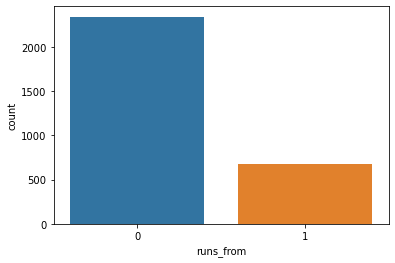

In [111]:
# Plot runs from data
runs_from = squirrel_df['runs_from'].sum()
sns.countplot(x='runs_from',data=squirrel_df)

<AxesSubplot:xlabel='approaches', ylabel='count'>

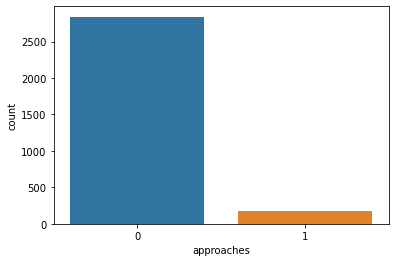

In [112]:
# Plot approaches data
approaches = squirrel_df['approaches'].sum()
sns.countplot(x='approaches',data=squirrel_df)

<AxesSubplot:xlabel='indifferent', ylabel='count'>

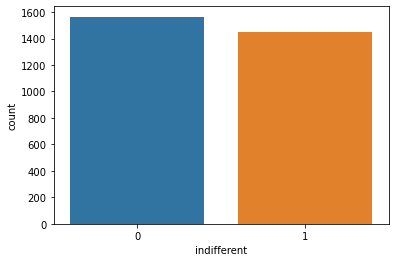

In [113]:
# Plot indifferent data
indifferent = squirrel_df['indifferent'].sum()
sns.countplot(x='indifferent',data=squirrel_df)

In [114]:
# Identify value counts of fur color
squirrel_df['indifferent'].value_counts()
squirrel_df['primary_fur_color'].value_counts()

Gray        2468
Cinnamon     392
Black        103
Name: primary_fur_color, dtype: int64

<AxesSubplot:xlabel='primary_fur_color', ylabel='approaches'>

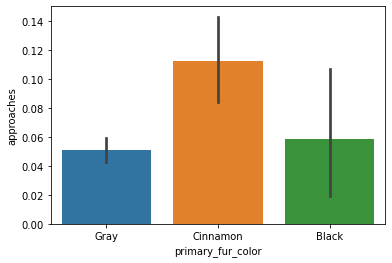

In [116]:
# Check which squirrel color type approaches most
sns.barplot(data=squirrel_df,x='primary_fur_color',y='approaches')

In [117]:
#Identify which 'other interactions' are not null
other_interactions = squirrel_df[squirrel_df['other_interactions'].notna()]
other_interactions.other_interactions

1                                   me
51      fenced off area can't approach
77                         gnd to tree
87                 ran from dog-walker
123                         dog chased
                     ...              
2932            looked at us from tree
2958                    avoided people
3009         eyes from a safe distance
3010                          scolding
3011                   runs from (dog)
Name: other_interactions, Length: 239, dtype: object

In [118]:
# Cast other interactions as string for loop
other_interactions['other_interactions'] = other_interactions['other_interactions'].astype(str)

/Users/Tyleah1/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [119]:
# Loop through other interactions and split into individual words
a_list = []
for value in other_interactions.other_interactions.str.split(' '):
    a_list.extend(value)
print(a_list)

['me', 'fenced', 'off', 'area', "can't", 'approach', 'gnd', 'to', 'tree', 'ran', 'from', 'dog-walker', 'dog', 'chased', 'avoided', 'people', 'curious', 'but', 'shy', 'studying', 'us', 'looking', 'for', 'food', 'watching', 'me', 'looked', 'at', 'us', 'unaware', 'of', 'looking/begging', 'for', 'food', 'child', 'chasing', 'indifferent', 'then', 'runs', 'from', 'mad!', 'stared', 'watching', 'eventually', 'ran', 'from', 'lawnmower', '(tail', 'flag)', 'approaches', '(food', 'stand)', 'dog', 'runs', 'from', '(me)', 'approaches', '(primarily),runs', 'from', '(initially),follows', "doesn't", 'see', 'me', 'dog', 'chased', 'came', 'over', 'on', 'tree', 'to', 'see', 'me', 'then', 'disappeared', 'see', 'stories', 'and', 'locations', 'approaches', '(slightly),wary', 'of', 'humans', 'approaches', '(he', 'saw', 'me,came', 'towards,then', 'darted', 'up)', 'ran', 'away', 'when', 'a', 'human', 'approached', 'with', 'a', 'dog', 'too', 'busy', 'eating', 'in', 'his', 'tree', 'indifferent', '(moving', 'very'

In [120]:
# Export and save to CSV
filepath = Path('Resources/other_interactions.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
other_interactions.to_csv(filepath)  

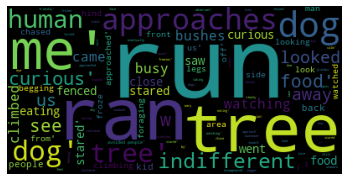

In [121]:
# Create a word cloud based on word frequency
fields = ['other_interactions']

#Read in saved and cleaned list
other_cloud = pd.read_csv('Resources/other_interactions.csv', usecols=fields)

# Count values of words
other_text = other_cloud['other_interactions'].values 

# Generate word cloud
wordcloud = WordCloud().generate(str(other_text))

# Plot word cloud
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [122]:
# Generate as phrases vs individual words
other_int = pd.read_csv('Resources/only_interactions.csv')  
other_int

,other_interactions
0,me
1,fenced off area can't approach
2,gnd to tree
3,ran from dog-walker
4,dog chased
...,...
235,looked at us from tree
236,avoided people
237,eyes from a safe distance
238,scolding


In [123]:
# Load in afinn as english analysis
afinn = Afinn(language='en')

In [124]:
# Apply afinn score to other interactions
other_int['afinn_score'] = other_int['other_interactions'].apply(afinn.score)

In [125]:
# Describe scores
other_int['afinn_score'].describe()

count    240.000000
mean      -0.137500
std        0.933931
min       -6.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: afinn_score, dtype: float64

In [126]:
# Print phrases based on afinn scores
columns_to_display = ['other_interactions', 'afinn_score']
pd.set_option('max_colwidth', 100)
other_int.sort_values(by='afinn_score')[columns_to_display].head(10)

,other_interactions,afinn_score
194,approaches (bad tourists w/ nuts),-6.0
144,"indifferent (lots of people taking its picture,didn't bother it)",-4.0
91,indifferent (was in a grassy area with no humans nearby),-3.0
14,mad!,-3.0
73,"approaches (saw me & came forward),runs from (startled by another person)",-2.0
86,scared,-2.0
186,"petrified,frozen (tail over its back,frozen)",-2.0
102,"indifferent (mostly,did notice me,busy eating,foraging)",-2.0
211,scared by dog,-2.0
30,indifferent (moving very fast),-2.0


In [127]:
# Sort values by positive ranges
other_int.sort_values(by='afinn_score')[columns_to_display].tail(10)

,other_interactions,afinn_score
164,human friendly,2.0
109,calm,2.0
117,friendly,2.0
118,interested in my presence,2.0
54,not backing down,2.0
56,approaches (very friendly),2.0
172,runs from (me!)—from a pretty big distance,2.0
136,looked down on me like her imperial subject,2.0
100,"watching me from tree,but calm",2.0
123,"very curious,looked like it expected food",3.0


<AxesSubplot:>

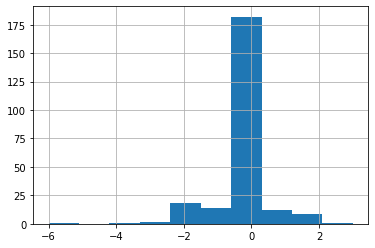

In [128]:
# Plot range of scores based on afinn
%matplotlib inline

other_int['afinn_score'].hist()

In [129]:
# Load sentiment to analyze phrases
sentiment = other_int['other_interactions'].apply(analyzer.polarity_scores)

In [130]:
# Create dataframe of sentiment analysis
sentiment_df = pd.DataFrame(sentiment.tolist())
sentiment_df

,neg,neu,pos,compound
0,0.000,1.000,0.00,0.0000
1,0.000,1.000,0.00,0.0000
2,0.000,1.000,0.00,0.0000
3,0.000,1.000,0.00,0.0000
4,0.000,1.000,0.00,0.0000
...,...,...,...,...
235,0.000,1.000,0.00,0.0000
236,0.706,0.294,0.00,-0.3400
237,0.000,0.580,0.42,0.4404
238,0.000,1.000,0.00,0.0000


In [131]:
other_int_sentiment = pd.concat([other_int,sentiment_df], axis = 1)
other_int_sentiment

,other_interactions,afinn_score,neg,neu,pos,compound
0,me,0.0,0.000,1.000,0.00,0.0000
1,fenced off area can't approach,0.0,0.000,1.000,0.00,0.0000
2,gnd to tree,0.0,0.000,1.000,0.00,0.0000
3,ran from dog-walker,0.0,0.000,1.000,0.00,0.0000
4,dog chased,0.0,0.000,1.000,0.00,0.0000
...,...,...,...,...,...,...
235,looked at us from tree,0.0,0.000,1.000,0.00,0.0000
236,avoided people,-1.0,0.706,0.294,0.00,-0.3400
237,eyes from a safe distance,1.0,0.000,0.580,0.42,0.4404
238,scolding,0.0,0.000,1.000,0.00,0.0000


In [132]:
#Create vaderized function
def vaderize(df, textfield):
    analyzer = SentimentIntensityAnalyzer()

    print('Estimating polarity scores for %d cases.' % len(other_int))
    other_int['other_interactions'].apply(analyzer.polarity_scores)

    # convert to dataframe
    sentiment_df = pd.DataFrame(sentiment.tolist()).add_prefix('vader_')

    # merge dataframes
    other_int_sentiment = pd.concat([other_int, sentiment_df], axis=1)
    return other_int_sentiment

In [133]:
df_vaderized = vaderize(other_int, 'other_interactions')

Estimating polarity scores for 240 cases.


In [134]:
df_vaderized

,other_interactions,afinn_score,vader_neg,vader_neu,vader_pos,vader_compound
0,me,0.0,0.000,1.000,0.00,0.0000
1,fenced off area can't approach,0.0,0.000,1.000,0.00,0.0000
2,gnd to tree,0.0,0.000,1.000,0.00,0.0000
3,ran from dog-walker,0.0,0.000,1.000,0.00,0.0000
4,dog chased,0.0,0.000,1.000,0.00,0.0000
...,...,...,...,...,...,...
235,looked at us from tree,0.0,0.000,1.000,0.00,0.0000
236,avoided people,-1.0,0.706,0.294,0.00,-0.3400
237,eyes from a safe distance,1.0,0.000,0.580,0.42,0.4404
238,scolding,0.0,0.000,1.000,0.00,0.0000


<AxesSubplot:ylabel='Frequency'>

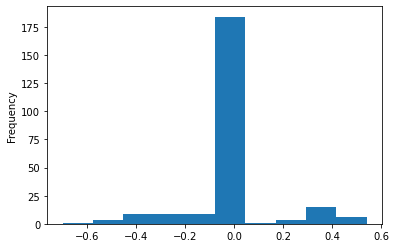

In [135]:
# Plot vaderized analysis
df_vaderized['vader_compound'].plot(kind='hist')

<AxesSubplot:xlabel='vader_pos', ylabel='vader_neg'>

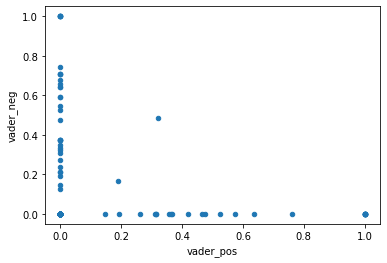

In [136]:
df_vaderized.plot.scatter(x='vader_pos', y = 'vader_neg')